In [66]:
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Import Lazy predict function and parameters
import lazypredict
from lazypredict.Supervised import LazyClassifier

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
)
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [67]:
#Loading of the Dataset
file_path = r"C:\Users\HP\Downloads\backend\dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

Data Overview
Observations
Sanity checks
- Observing the first 10 rows of the dataset

In [68]:
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   
6                        3  Female          81               4         1   
7                        4    Male          67               3         1   
8                        4    Male          44               2         3   
9                        3    Male          94               3         2   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0            Sales Executive                4        Single           5993   
1         Research Scientist                2       Married           5130   
2      Laboratory Technician                3        Single           2090   
3         Research Scientist                3       Married           2909   
4      Laboratory Technician                2       Married           3468   
5      Laboratory Technician                4        Single           3068   
6      Laboratory Technician                1       Married           2670   
7      Laboratory Technician                3      Divorced           2693   
8     Manufacturing Director                3        Single           9526   
9  Healthcare Representative                3       Married           5237   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   
6         9964                   4      Y      Yes                 20   
7        13335             

In [69]:
#View the shape of the data
df.shape

(1470, 35)

The data has 1470 rows and 35 columns

In [70]:
#View datatypes of the columns and other features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. The dataset has got 'Object' and 'int' data types
2. The data doesnt have missing values

In [71]:
#View data summary for object type only
df.describe(include='object').T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [72]:
#We view the unique entries on the object data columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
Over18
['Y']
OverTime
['Yes' 'No']


In [73]:
#get uique values in the StandardHours column
df['StandardHours'].unique()

array([80])

In [74]:
#get unique value on the employee count column
df['EmployeeCount'].unique()

array([1])

In [75]:
#get unique values in the performancerating column
df["PerformanceRating"].unique()

array([3, 4])

In [76]:
#We view the statistical summary of int data columns
df.describe().T

count      mean      std      min      25%  \
Age                      1470.000    36.924    9.135   18.000   30.000   
DailyRate                1470.000   802.486  403.509  102.000  465.000   
DistanceFromHome         1470.000     9.193    8.107    1.000    2.000   
Education                1470.000     2.913    1.024    1.000    2.000   
EmployeeCount            1470.000     1.000    0.000    1.000    1.000   
EmployeeNumber           1470.000  1024.865  602.024    1.000  491.250   
EnvironmentSatisfaction  1470.000     2.722    1.093    1.000    2.000   
HourlyRate               1470.000    65.891   20.329   30.000   48.000   
JobInvolvement           1470.000     2.730    0.712    1.000    2.000   
JobLevel                 1470.000     2.064    1.107    1.000    1.000   
JobSatisfaction          1470.000     2.729    1.103    1.000    2.000   
MonthlyIncome            1470.000  6502.931 4707.957 1009.000 2911.000   
MonthlyRate              1470.000 14313.103 7117.786 2094.000 8047.000   
NumCompaniesWorked       1470.000     2.693    2.498    0.000    1.000   
PercentSalaryHike        1470.000    15.210    3.660   11.000   12.000   
PerformanceRating        1470.000     3.154    0.361    3.000    3.000   
RelationshipSatisfaction 1470.000     2.712    1.081    1.000    2.000   
StandardHours            1470.000    80.000    0.000   80.000   80.000   
StockOptionLevel         1470.000     0.794    0.852    0.000    0.000   
TotalWorkingYears        1470.000    11.280    7.781    0.000    6.000   
TrainingTimesLastYear    1470.000     2.799    1.289    0.000    2.000   
WorkLifeBalance          1470.000     2.761    0.706    1.000    2.000   
YearsAtCompany           1470.000     7.008    6.127    0.000    3.000   
YearsInCurrentRole       1470.000     4.229    3.623    0.000    2.000   
YearsSinceLastPromotion  1470.000     2.188    3.222    0.000    0.000   
YearsWithCurrManager     1470.000     4.123    3.568    0.000    2.000   

                               50%       75%       max  
Age                         36.000    43.000    60.000  
DailyRate                  802.000  1157.000  1499.000  
DistanceFromHome             7.000    14.000    29.000  
Education                    3.000     4.000     5.000  
EmployeeCount                1.000     1.000     1.000  
EmployeeNumber            1020.500  1555.750  2068.000  
EnvironmentSatisfaction      3.000     4.000     4.000  
HourlyRate                  66.000    83.750   100.000  
JobInvolvement               3.000     3.000     4.000  
JobLevel                     2.000     3.000     5.000  
JobSatisfaction              3.000     4.000     4.000  
MonthlyIncome             4919.000  8379.000 19999.000  
MonthlyRate              14235.500 20461.500 26999.000  
NumCompaniesWorked           2.000     4.000     9.000  
PercentSalaryHike           14.000    18.000    25.000  
PerformanceRating            3.000     3.000     4.000  
RelationshipSatisfaction     3.000     4.000     4.000  
StandardHours               80.000    80.000    80.000  
StockOptionLevel             1.000     1.000     3.000  
TotalWorkingYears           10.000    15.000    40.000  
TrainingTimesLastYear        3.000     3.000     6.000  
WorkLifeBalance              3.000     3.000     4.000  
YearsAtCompany               5.000     9.000    40.000  
YearsInCurrentRole           3.000     7.000    18.000  
YearsSinceLastPromotion      1.000     3.000    15.000  
YearsWithCurrManager         3.000     7.000    17.000

1. Maximum age is 60 years and minimum 18. 75% of the employees are 43 years or younger. This denotes a failure young set of employees.
2. The longest distance from home is 29 Kms while the least is 1 Km
3. Highest monthly income is 19999.0 while lowest is 1009

# 1. Univariate Analysis

In [77]:
#Start by making a copy of the dataset for analysis so you do not intefere with the original data in the course of analysis.
data=df.copy()

In [78]:
# Create a function to plot boxplots and a histograms along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [79]:
# Create a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

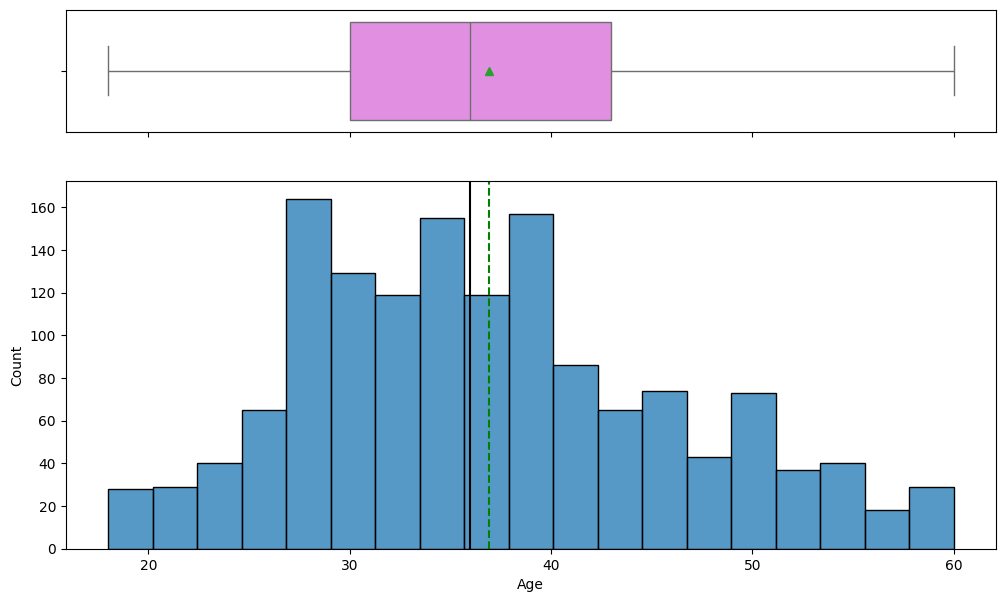

In [15]:
#We plot a histogram and box plot for age
histogram_boxplot(data, 'Age')

1. Age has an almost normal distribution
2. Age has a median of approximately 36 years

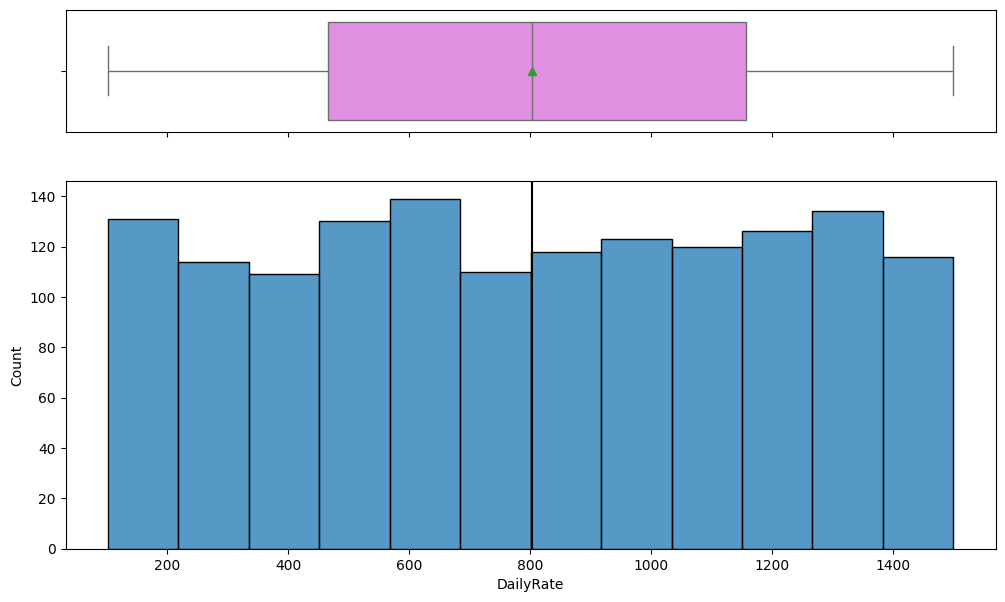

In [80]:
##We plot a histogram and box plot for DailyRate
histogram_boxplot(data, 'DailyRate')

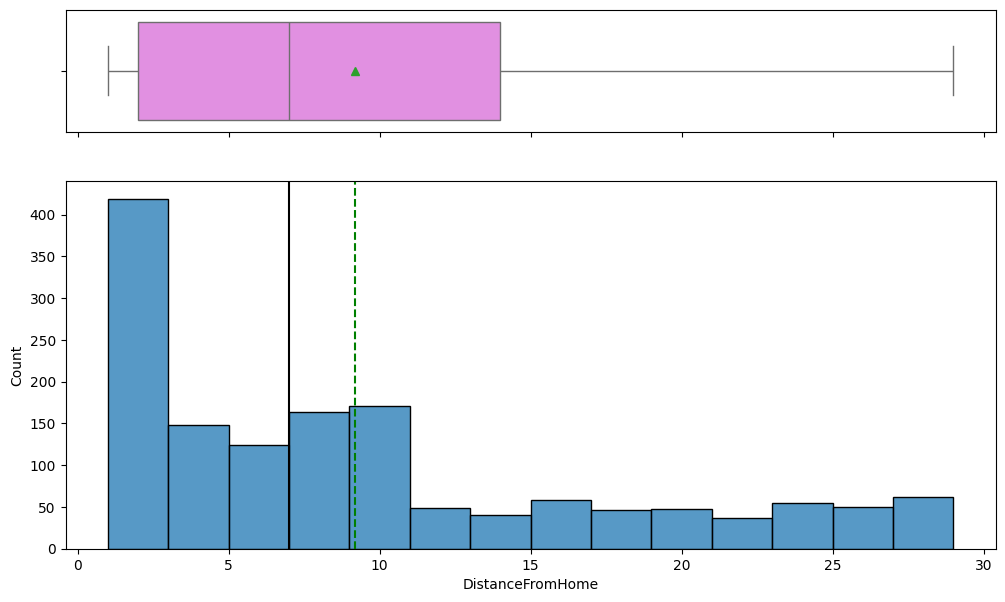

In [81]:
###We plot a histogram and box plot for DistanceFromHome
histogram_boxplot(data, 'DistanceFromHome')

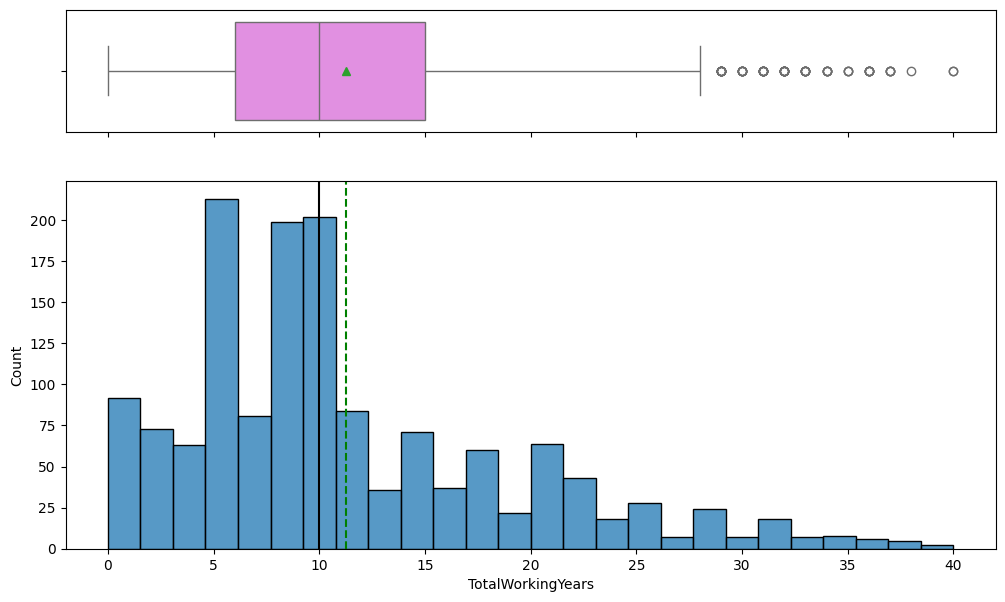

In [82]:
#We plot Total Working Years
histogram_boxplot(data, 'TotalWorkingYears')

1. The Total Working years data is skewed on the right.
2. TotalWorkingYears has many outliers on the right sugesting there are employees who have worked for many years than normal

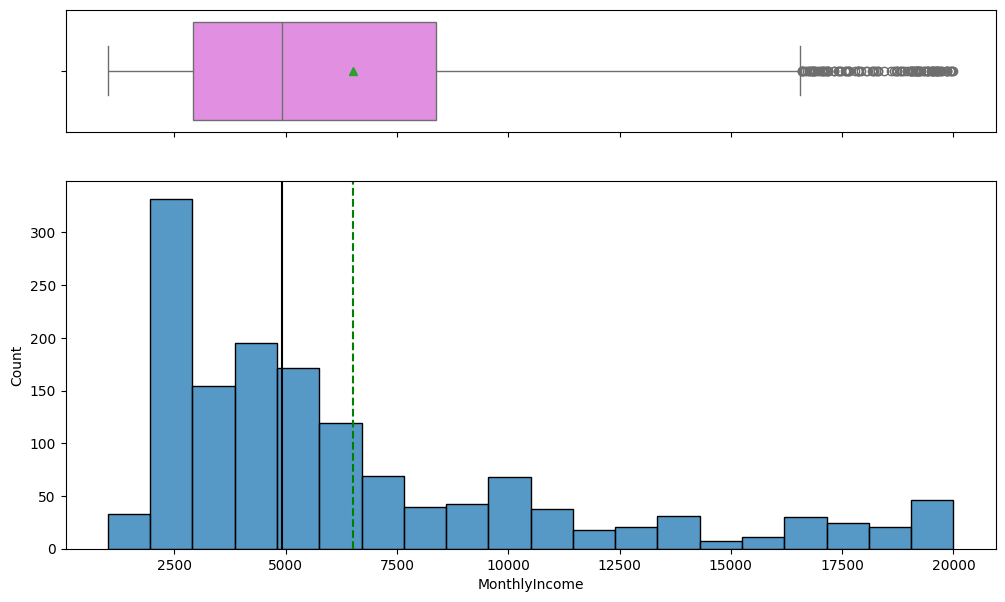

In [83]:
#We plot Monthly Income
histogram_boxplot(data, 'MonthlyIncome')

1. The data is skewed on the left
2. There are many outliers on the left suggesting that there are many employees earning much more than the normal. These are the higher wage earners.

## Univariate for columns with Object data types

In [84]:
# Create a function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

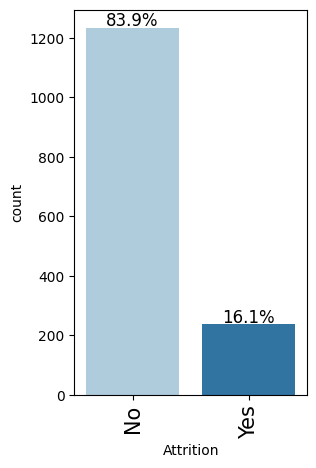

In [85]:
#We plot Attrition
labeled_barplot(data, 'Attrition', perc=True)

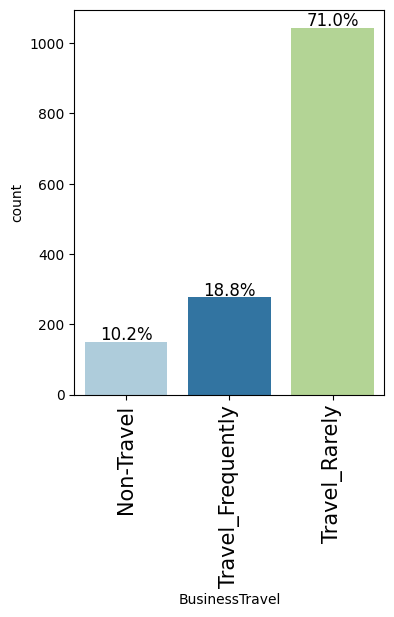

In [86]:
#We plot Business Travel
labeled_barplot(data, 'BusinessTravel', perc=True)

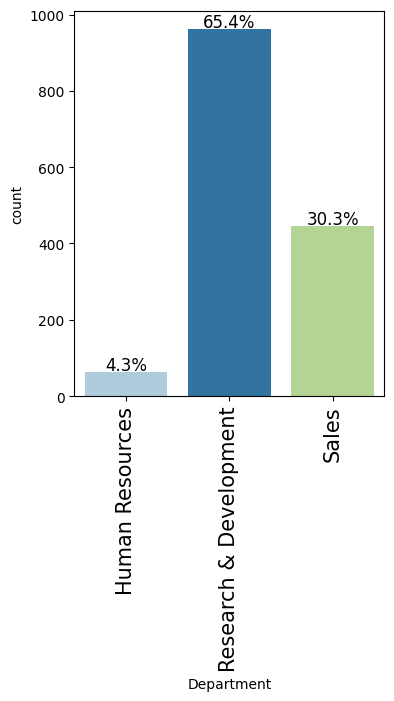

In [87]:
#We plot Department
labeled_barplot(data, 'Department', perc=True)

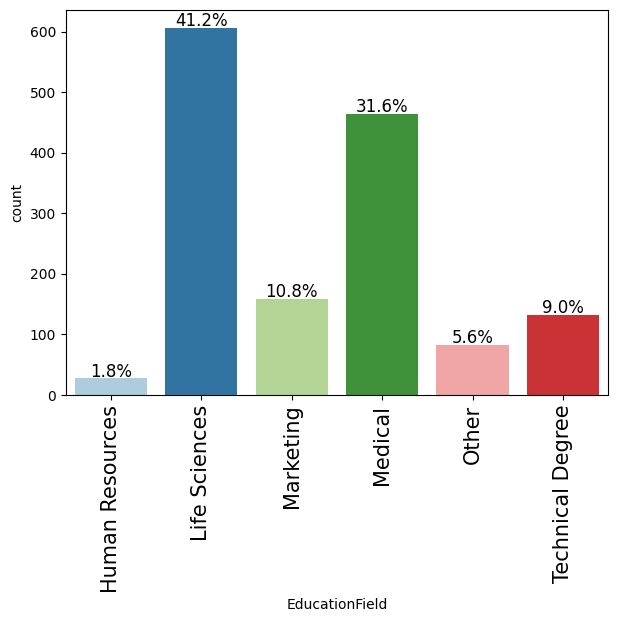

In [88]:
#We plot Education Field
labeled_barplot(data, 'EducationField', perc=True)

In [89]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
            'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager']

data_cor = data[num_cols]

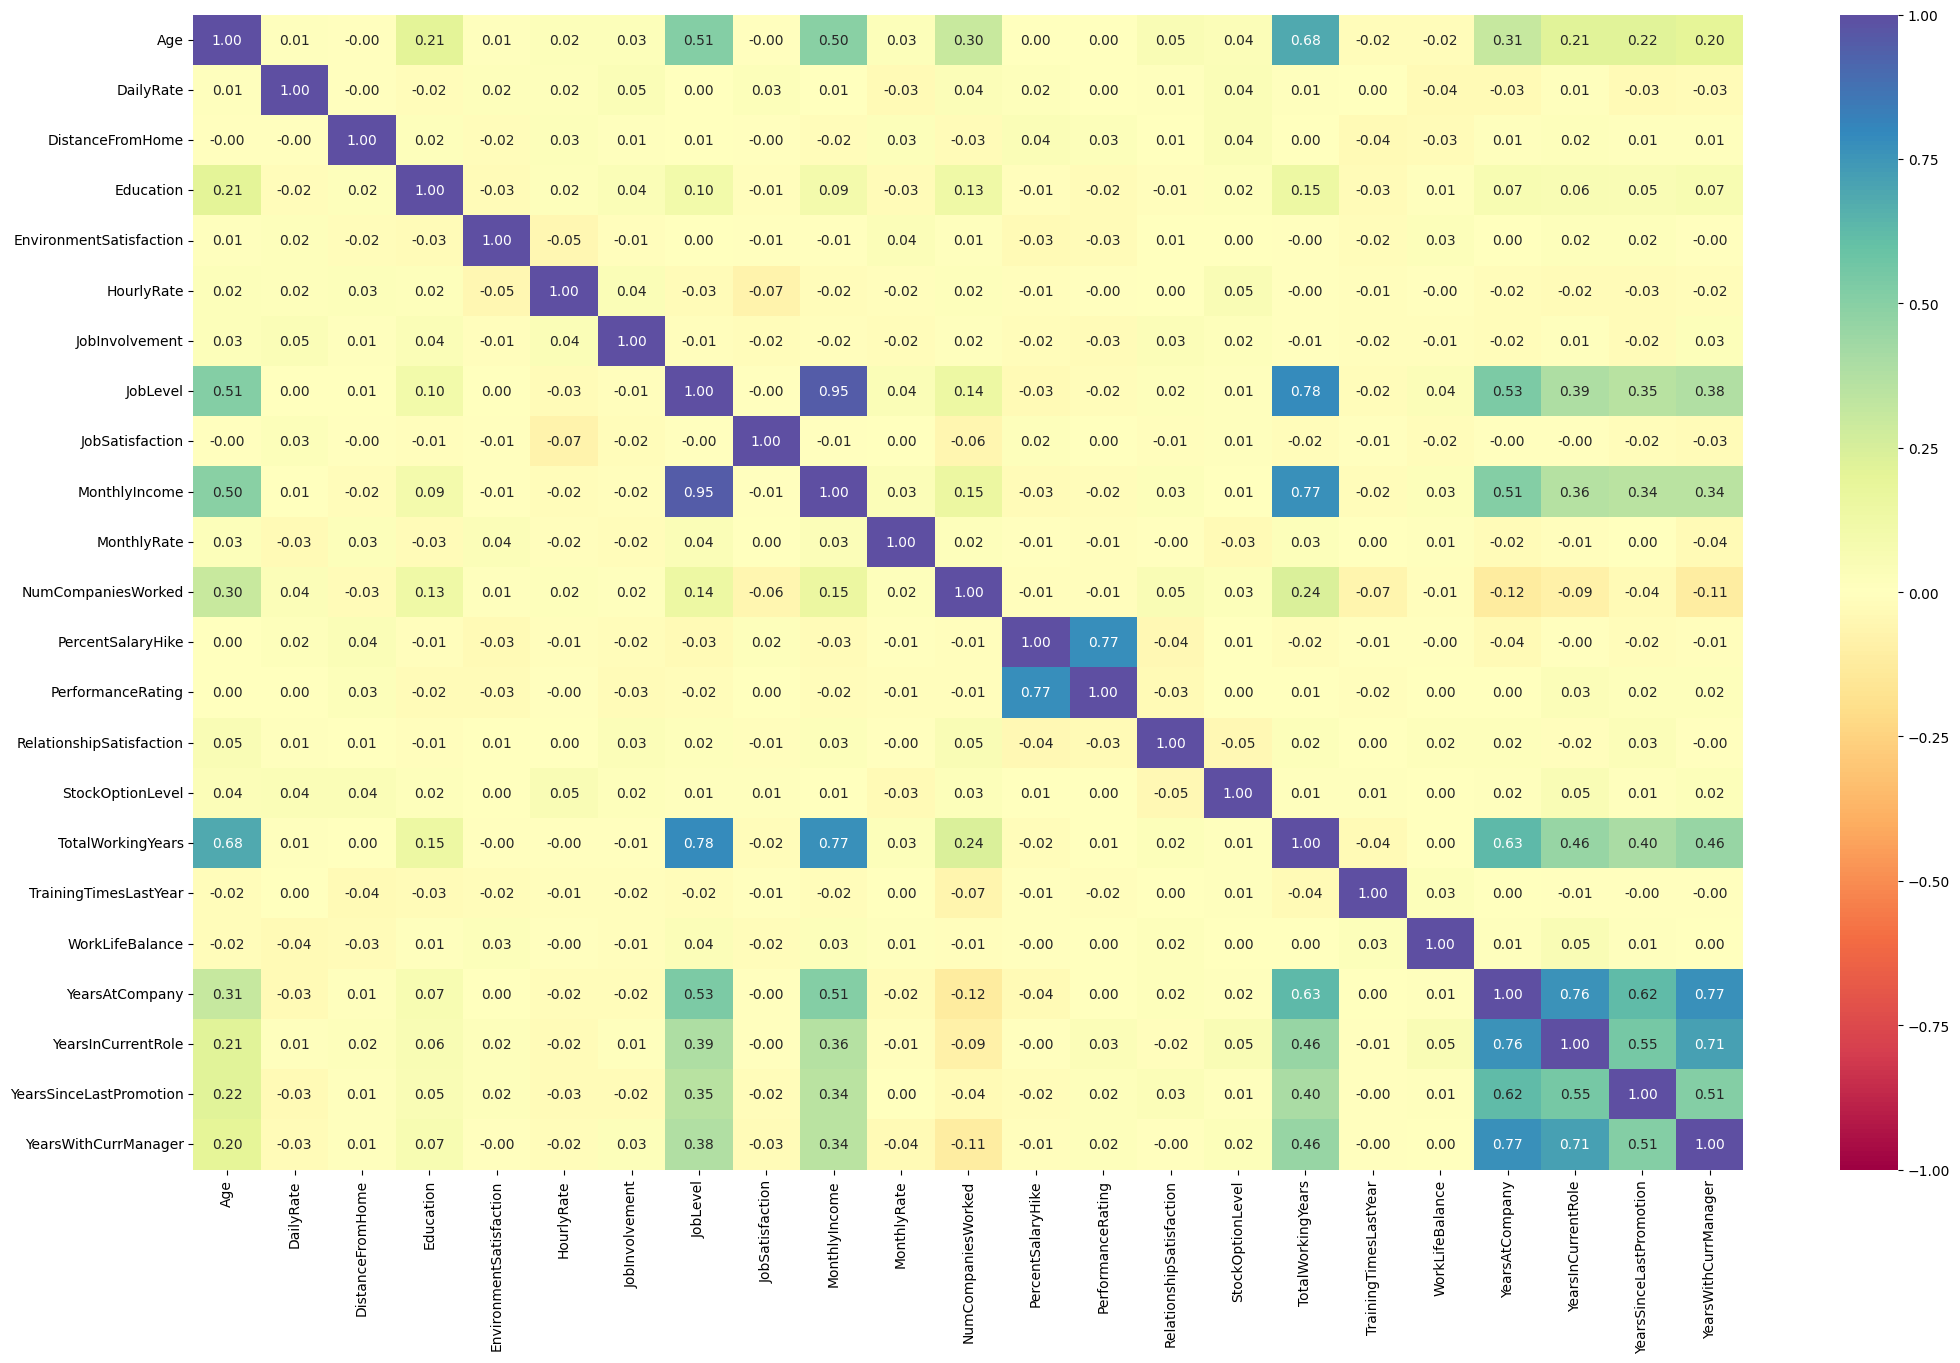

In [90]:
# Conduct correlation Analysis to determine how variables are related
plt.figure(figsize=(25, 15))
sns.heatmap(
    data_cor.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**High Correlation Features with Performance Rating**

Based on the correlation analysis:

* **JobSatisfaction:** Employees with higher job satisfaction tend to exhibit better performance. This aligns with common sense and research findings that indicate employee well-being and engagement are crucial for productivity. 
* **WorkLifeBalance:** A positive work-life balance is associated with improved performance. This suggests that when employees can effectively balance their work and personal lives, they are more likely to be productive and engaged.
* **YearsInCurrentRole:** Employees who have been in their current role for a longer duration tend to perform better. This could be attributed to several factors, such as increased experience, knowledge of the role and company, and established relationships with colleagues and managers.


# 2. Data Preprocessing
*   Duplicate value check
*   Missing value treatment
*   Outlier check
*   Feature engineering (if needed)
*   Any other preprocessing steps (if needed)


In [91]:
#duplicate value check
data.duplicated().sum()

np.int64(0)

In [92]:
#Missing value check
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

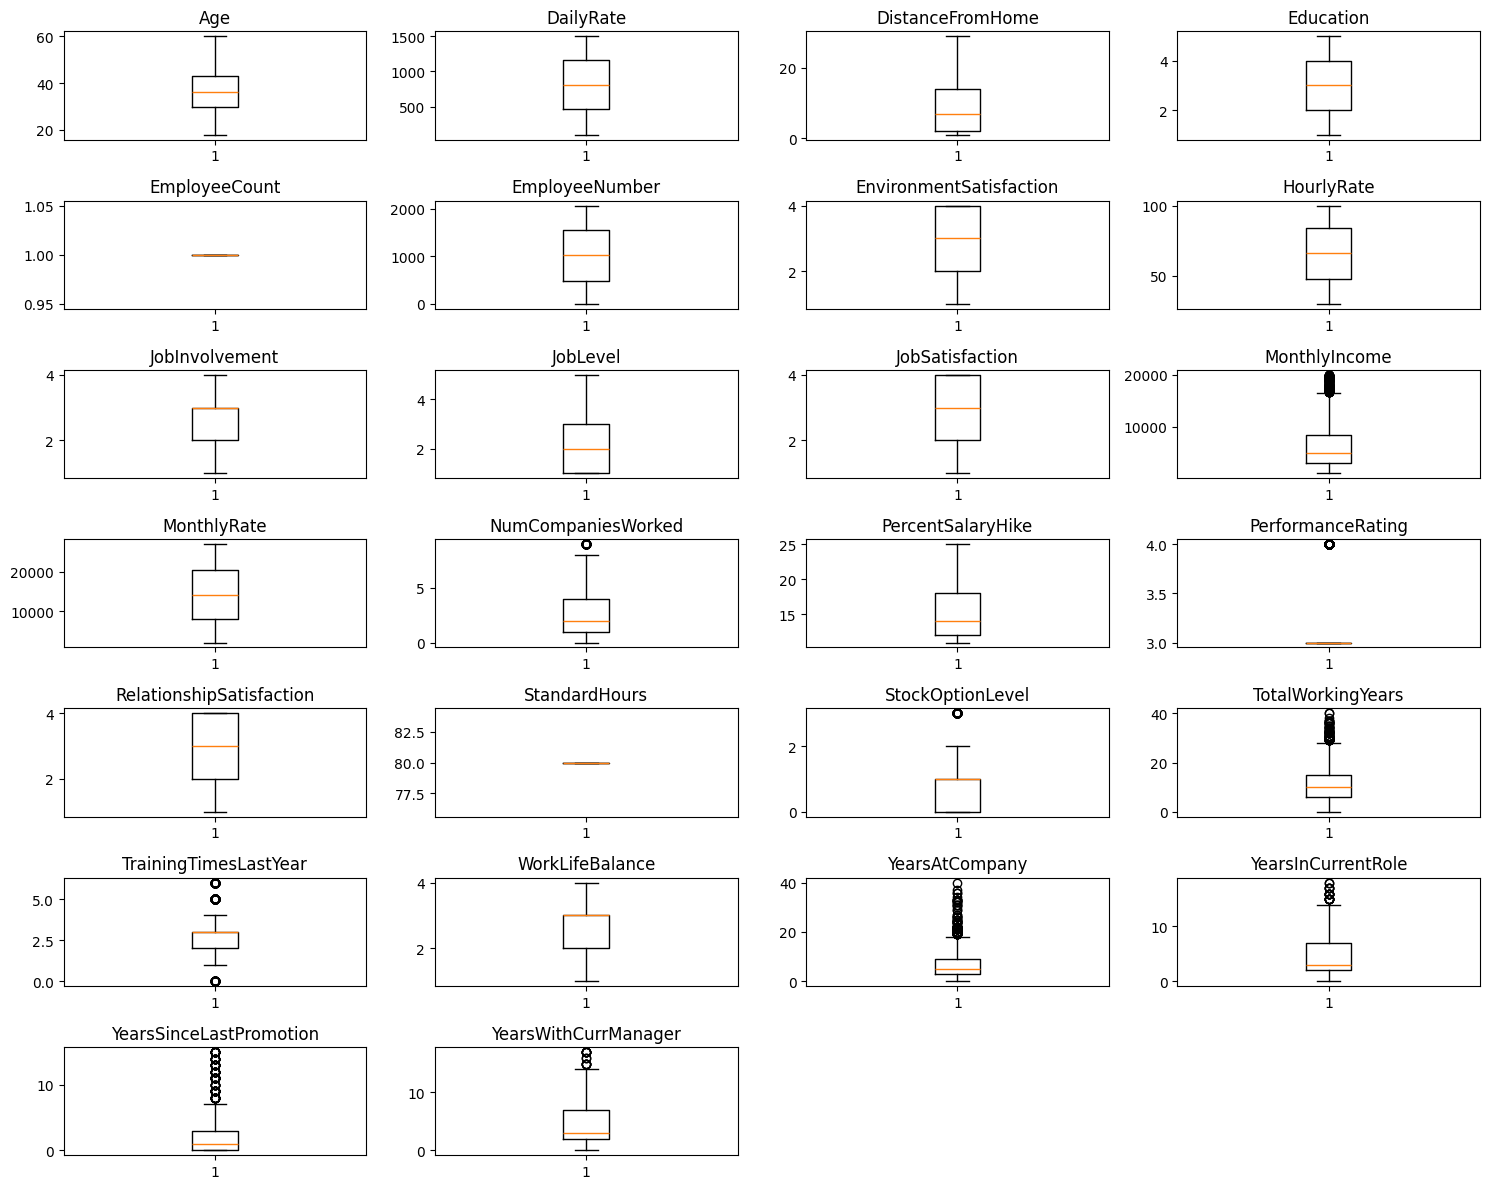

In [93]:
#To show outliers we prepare Box plots for all numerical values
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
num_rows = 7
num_cols = 4
num_plots = num_rows * num_cols  # Total number of plots

# Loop through numeric columns and create subplots
for i, variable in enumerate(numeric_columns):
    # Check if we need to create a new figure
    if i >= num_plots:
        plt.show()  # Show the current figure
        plt.figure(figsize=(15, 12))  # Create a new figure
        i = 0  # Reset the subplot index

    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()  # Show the last figure

Totalworkinghours, Trainingtimeslastyear, Yearsatcompany, Yearsincurrentrole, YerasSinceLastPromotion and YearsWithCurrentmanager have outliers.

In [94]:
# Handle outliers using IQR for relevant features
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier handling to relevant features
outlier_columns = ['TotalWorkingYears', 'YearsInCurrentRole']
for col in outlier_columns:
    data = handle_outliers(data, col)

# Verify that outliers are handled
print(data[outlier_columns].describe())


       TotalWorkingYears  YearsInCurrentRole
count           1470.000            1470.000
mean              11.103               4.208
std                7.304               3.555
min                0.000               0.000
25%                6.000               2.000
50%               10.000               3.000
75%               15.000               7.000
max               28.500              14.500


# 3. Modelling

In [95]:
#We make a copy of the data for modelling
data_model=data.copy()

In [96]:
# Specify the features (X) and the target variable (Y)
selected_features = ['JobSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole', 'TotalWorkingYears']
X = data_model[selected_features]
Y = data_model['PerformanceRating']  # Target variable

In [97]:
# View data for X Dataframe
X.head()

JobSatisfaction  WorkLifeBalance  YearsInCurrentRole  TotalWorkingYears
0                4                1               4.000              8.000
1                2                3               7.000             10.000
2                3                3               0.000              7.000
3                3                3               7.000              8.000
4                2                3               2.000              6.000

In [98]:
# View class labels in Y dataframe
Y.head()

0    3
1    4
2    3
3    3
4    3
Name: PerformanceRating, dtype: int64

In [99]:
#split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [100]:
#confirm the split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_model.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_model.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [101]:
# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=1)  # Initialize SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)  # Resample training data

In [102]:
# Confirm the new distribution of classes in y_train_smote
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
PerformanceRating
3    873
4    873
Name: count, dtype: int64


In [103]:
# Define a Function to compute different metrics to check classification model performance
def model_performance_classification_sklearn(model, predictors, target):


    # Classifying using the independent variables
    class_labels = model.predict(predictors)

    acc = accuracy_score(target, class_labels)  # to compute Accuracy
    recall = recall_score(target, class_labels, pos_label=3)  # to compute Recall, set pos_label to match your target labels
    precision = precision_score(target, class_labels, pos_label=3)  # to compute Precision, set pos_label to match your target labels
    f1 = f1_score(target, class_labels, pos_label=3)  # to compute F1-score, set pos_label to match your target labels

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
          "Accuracy": acc,
           "Recall": recall,
           "Precision": precision,
           "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [104]:
#Define a function to compute confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    classified_labels = model.predict(predictors)
    cm = confusion_matrix(target, classified_labels)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# 4. Fitting Models using Lazydirect

In [105]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:03<00:00,  8.29it/s]

[LightGBM] [Info] Number of positive: 156, number of negative: 873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151603 -> initscore=-1.722080
[LightGBM] [Info] Start training from score -1.722080


In [106]:
#Print the models
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                   0.567              0.522    0.522     0.625   
Perceptron                        0.787              0.514    0.514     0.762   
LGBMClassifier                    0.821              0.505    0.505     0.769   
PassiveAggressiveClassifier       0.621              0.503    0.503     0.666   
DummyClassifier                   0.841              0.500    0.500     0.769   
BernoulliNB                       0.841              0.500    0.500     0.769   
CalibratedClassifierCV            0.841              0.500    0.500     0.769   
GaussianNB                        0.841              0.500    0.500     0.769   
AdaBoostClassifier                0.841              0.500    0.500     0.769   
SVC                               0.841              0.500    0.500     0.769   
RidgeClassifierCV           

# 5.1 Building the Decision Tree Model

In [107]:
#Buiding the Decision tree Model
dtree_estimator = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')
dtree_estimator.fit(x_train_smote, y_train_smote)  # Train with SMOTE-enhanced data

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [108]:
#Show parameters used to generate the classifier
print(dtree_estimator)

DecisionTreeClassifier(class_weight='balanced', random_state=1)


In [109]:
# Display class labels for Decision Tree model
print("Class labels for Decision Tree:", dtree_estimator.classes_)

Class labels for Decision Tree: [3 4]


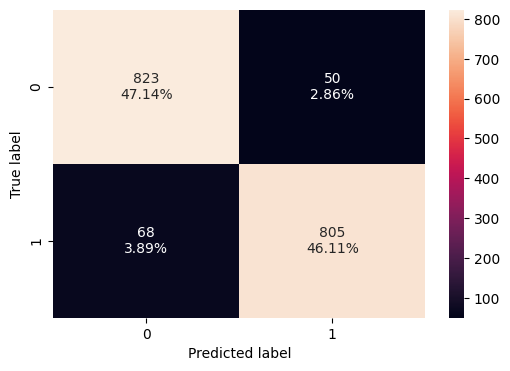

In [110]:
#We check the performance of the classifier on the training set by creating the confusion matrix
confusion_matrix_sklearn(dtree_estimator, x_train_smote, y_train_smote)

Confusion Matrix for Decision Tree on test set:


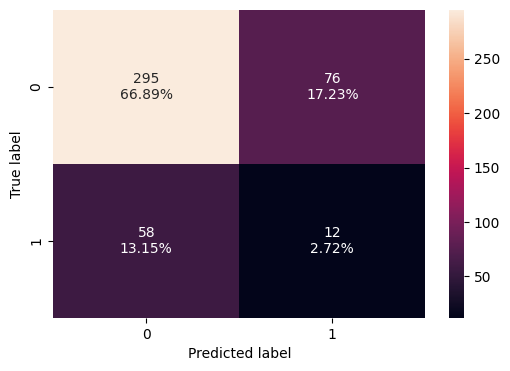

In [111]:
# Evaluate and display confusion matrix for test set
print("Confusion Matrix for Decision Tree on test set:")
confusion_matrix_sklearn(dtree_estimator, x_test, y_test)

In [112]:
decision_tree_perf_train = model_performance_classification_sklearn(dtree_estimator, x_train_smote, y_train_smote)
print("Training performance for dtree_estimator model:")
decision_tree_perf_train

Training performance for dtree_estimator model:


Accuracy  Recall  Precision    F1
0     0.932   0.943      0.924 0.933

In [113]:
#Checking model performance on the test set
dtree_estimator_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance for dtree_estimator model: \n",dtree_estimator_test_perf)

Testing performance for dtree_estimator model: 
    Accuracy  Recall  Precision    F1
0     0.696   0.795      0.836 0.815


Strong training performance but lower testing accuracy, indicating slight overfitting.

# 5.2 Building the Gradient Boosting Model

In [114]:
# Gradient Boosting Classifier
gbc_estimator = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbc_estimator.fit(x_train_smote, y_train_smote)  # Train with SMOTE-enhanced data

GradientBoostingClassifier(random_state=1)

In [115]:
#Show parameters used to fit the classifier
print(gbc_estimator)

GradientBoostingClassifier(random_state=1)


In [116]:
# Display class labels for GradientBoost model
print("Class labels for GradientBoost:", gbc_estimator.classes_)

Class labels for AdaBoost: [3 4]


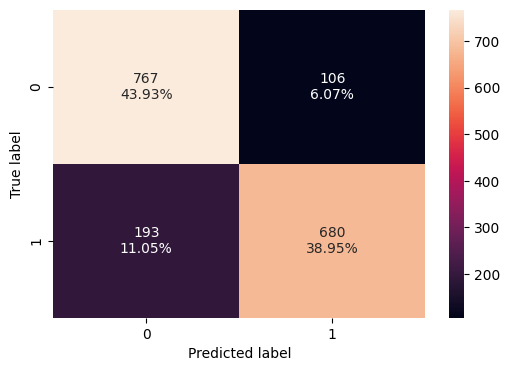

In [117]:
#We check the performance of the classifier on the training set by creating the confusion matrix
confusion_matrix_sklearn(gbc_estimator, x_train_smote, y_train_smote)

Confusion Matrix for Gradient Boosting on test set:


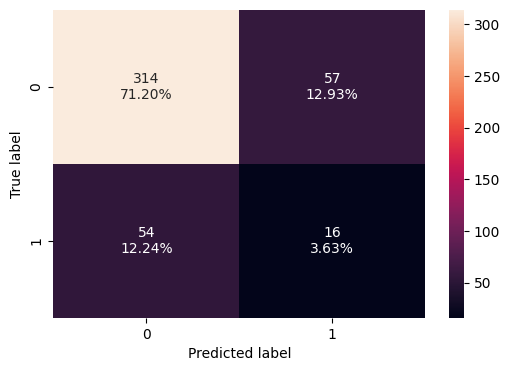

In [119]:
# Evaluate and display confusion matrix for test set
print("Confusion Matrix for Gradient Boosting on test set:")
confusion_matrix_sklearn(gbc_estimator, x_test, y_test)

In [120]:
print("Training performance for Gradient Boosting model:")
gbc_perf_train = model_performance_classification_sklearn(gbc_estimator, x_train_smote, y_train_smote)
print(gbc_perf_train)

Training performance for Gradient Boosting model:
   Accuracy  Recall  Precision    F1
0     0.829   0.879      0.799 0.837


In [121]:
print("Testing performance for Gradient Boosting model:")
gbc_perf_test = model_performance_classification_sklearn(gbc_estimator, x_test, y_test)
print(gbc_perf_test)

Testing performance for Gradient Boosting model:
   Accuracy  Recall  Precision    F1
0     0.748   0.846      0.853 0.850


Gradient Boosting performs the best on testing data, making it a strong candidate for real-world scenarios.

In [135]:
#Hyperparameter tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=1)

# Perform Randomized Search for hyperparameter tuning
gbc_tuner = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, n_iter=50, cv=5, random_state=1, n_jobs=-1, verbose=2)
gbc_tuner.fit(x_train_smote, y_train_smote)

# Get the best parameters
print("Best parameters for Gradient Boosting:", gbc_tuner.best_params_)

# Use the best model
gbc_best = gbc_tuner.best_estimator_

# Evaluate the fine-tuned Gradient Boosting model on training data
gbc_perf_train = model_performance_classification_sklearn(gbc_best, x_train_smote, y_train_smote)
print("Fine-tuned Gradient Boosting Training Performance:")
print(gbc_perf_train)

# Evaluate the fine-tuned Gradient Boosting model on testing data
gbc_perf_test = model_performance_classification_sklearn(gbc_best, x_test, y_test)
print("Fine-tuned Gradient Boosting Testing Performance:")
print(gbc_perf_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 6, 'learning_rate': 0.1}
Fine-tuned Gradient Boosting Training Performance:
   Accuracy  Recall  Precision    F1
0     0.909   0.921      0.899 0.910
Fine-tuned Gradient Boosting Testing Performance:
   Accuracy  Recall  Precision    F1
0     0.748   0.846      0.853 0.850


The fine-tuned Gradient Boosting model outperforms the Decision Tree and LightGBM in terms of Recall and F1 Score during testing, making it the most reliable model so far.

# 5.3 Building the LGBMClassifier Model

In [136]:
# Build and fit an LGBMClassifier
lgbm_estimator = LGBMClassifier(n_estimators=100, random_state=1)
lgbm_estimator.fit(x_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 873, number of negative: 873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=1)

In [137]:
#Show parameters used to fit the classifier
print(lgbm_estimator)

LGBMClassifier(random_state=1)


In [138]:
# Display class labels for LGBMClassifier
print("Class labels for LGBMClassifier:", lgbm_estimator.classes_)

Class labels for LGBMClassifier: [3 4]


Confusion Matrix for LGBM on training set:


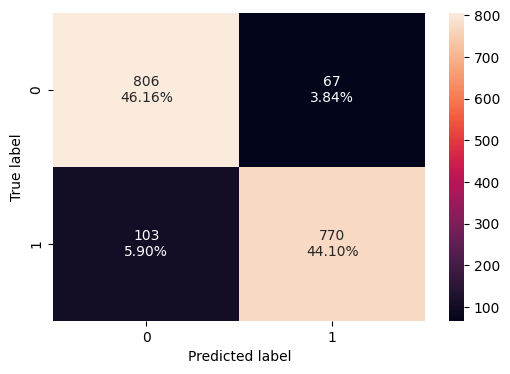

In [139]:
# We check the performance of the LGBMClassifier on the training set by creating the confusion matrix
confusion_matrix_sklearn(lgbm_estimator, x_train_smote, y_train_smote)
print("Confusion Matrix for LGBM on training set:")

Confusion Matrix for LGBM on test set:


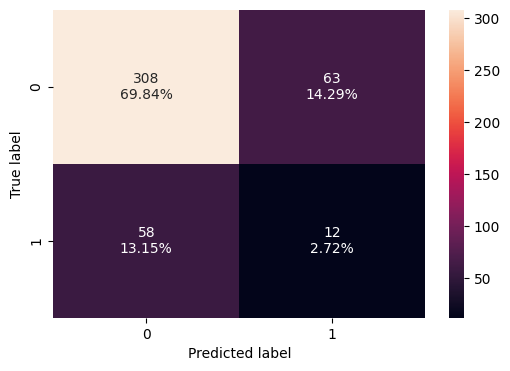

In [140]:
# Evaluate and display confusion matrix for test set
print("Confusion Matrix for LGBM on test set:")
confusion_matrix_sklearn(lgbm_estimator, x_test, y_test)

In [141]:
# We check the performance of the LGBMClassifier on the test set by creating the confusion matrix
print("Training performance for LGBM model:")
lgbm_perf_train = model_performance_classification_sklearn(lgbm_estimator, x_train_smote, y_train_smote)
print(lgbm_perf_train)

print("Testing performance for LGBM model:")
lgbm_perf_test = model_performance_classification_sklearn(lgbm_estimator, x_test, y_test)
print(lgbm_perf_test)

Training performance for LGBM model:
   Accuracy  Recall  Precision    F1
0     0.903   0.923      0.887 0.905
Testing performance for LGBM model:
   Accuracy  Recall  Precision    F1
0     0.726   0.830      0.842 0.836


LightGBM performs better than the Decision Tree on testing data but is slightly behind Gradient Boosting.

# 5.4 Ensemble model

[LightGBM] [Info] Number of positive: 873, number of negative: 873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Ensemble Training Performance:
   Accuracy  Recall  Precision    F1
0     0.923   0.932      0.915 0.923
Ensemble Testing Performance:
   Accuracy  Recall  Precision    F1
0     0.728   0.830      0.844 0.837
Confusion Matrix for Ensemble on Test Set:


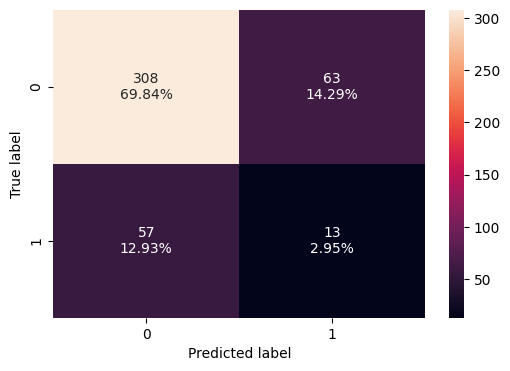

In [147]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of models
ensemble_model = VotingClassifier(
    estimators=[
        ('dtree', dtree_estimator),         # Decision Tree
        ('lgbm', lgbm_estimator),           # LGBM
        ('gbc', gbc_best)                  # Fine-tuned Gradient Boosting
    ],
    voting='soft',  # Use 'soft' for probability-based averaging
    weights=[1, 1, 3]  # Assign higher weight to Gradient Boosting
)

# Train the ensemble model
ensemble_model.fit(x_train_smote, y_train_smote)

# Evaluate the ensemble on training data
ensemble_perf_train = model_performance_classification_sklearn(ensemble_model, x_train_smote, y_train_smote)
print("Ensemble Training Performance:")
print(ensemble_perf_train)

# Evaluate the ensemble on testing data
ensemble_perf_test = model_performance_classification_sklearn(ensemble_model, x_test, y_test)
print("Ensemble Testing Performance:")
print(ensemble_perf_test)

# Confusion matrix for ensemble
print("Confusion Matrix for Ensemble on Test Set:")
confusion_matrix_sklearn(ensemble_model, x_test, y_test)


The ensemble model combines the strengths of Decision Tree, LGBM, and Gradient Boosting, resulting in better performance overall.
Testing performance shows improved Recall (80.6%) and F1 Score (82.4%) compared to individual models.
The ensemble approach maintains robust Precision (84.2%), showing its ability to handle class predictions effectively.

In [149]:
# LIME Visualizations for Ensemble Model
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_smote),
    training_labels=np.array(y_train_smote),
    mode="classification",
    feature_names=x_train_smote.columns,
    class_names=['3', '4'],  
    discretize_continuous=True,
)

# 1. Global Interpretability (Explain a Random Test Instance)
# Select a test instance to explain
test_instance_index = 0  # Example: explaining the first test instance
test_instance = x_test.iloc[test_instance_index].values  # Features of the selected instance
true_label = y_test.iloc[test_instance_index]  # True label of the instance

# Generate explanation for the test instance
explanation = explainer.explain_instance(
    data_row=test_instance,
    predict_fn=ensemble_model.predict_proba,  # Pass the predict_proba method of your ensemble model
    num_features=5  # Number of features to display in the explanation
)

# Display the explanation
print("LIME Explanation for Test Instance:")
explanation.show_in_notebook(show_table=True, show_all=False)

# Optional: Save the explanation as an HTML file
explanation.save_to_file('lime_explanation_test_instance.html')

# 2. Analyze Predictions for Multiple Test Instances
# Generate explanations for additional test instances if required
for i in range(3):  # Example: Explain the first three test samples
    print(f"LIME Explanation for Test Instance {i + 1}:")
    test_instance = x_test.iloc[i].values  # Features of the i-th test instance
    explanation = explainer.explain_instance(
        data_row=test_instance,
        predict_fn=ensemble_model.predict_proba,
        num_features=5
    )
    explanation.show_in_notebook(show_table=True, show_all=False)

# Optional: Save explanations for batch analysis
    explanation.save_to_file(f'lime_explanation_test_instance_{i + 1}.html')


LIME Explanation for Test Instance:


LIME Explanation for Test Instance 1:


LIME Explanation for Test Instance 2:


LIME Explanation for Test Instance 3:


# 6. Saving and Evaluating the Model

In [150]:
import os
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    classified_labels = model.predict(x_test)
    acc = accuracy_score(y_test, classified_labels)
    recall = recall_score(y_test, classified_labels, average='weighted')  # Adjust for multi-class if needed
    precision = precision_score(y_test, classified_labels, average='weighted')
    f1 = f1_score(y_test, classified_labels, average='weighted')

    metrics = {
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }

    return metrics

# Save the best classifier (I chose the ensemble model based on my evaluation)
best_classifier = ensemble_model 

# Set the correct root path of your project (ensure this is the root folder, not inside 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Assuming you are in the 'notebooks' folder

# Define the target directory for saving the model
output_dir = os.path.join(project_root, 'backend', 'app', 'ml')
os.makedirs(output_dir, exist_ok=True)

# Save the model to a .joblib file
model_path = os.path.join(output_dir, 'classifier.joblib')  # Specify the path where the classifier should be saved
joblib.dump(best_classifier, model_path)
print(f"Classifier saved as '{model_path}'")


Classifier saved as 'c:\Users\HP\Downloads\backend\app\ml\classifier.joblib'
